# Machine Learning Training and Models

## 1. Import Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

import os
import pandas as pd
import numpy as np
import psycopg2
from sqlalchemy import create_engine
import time
from pathlib import Path
import pickle
from collections import Counter

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.ensemble.forest import RandomForestClassifier

import tensorflow as tf

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Activation, Dense
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import matplotlib
from sklearn.datasets import make_blobs
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

D:\AnacondaJupyter\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


## 2. Import the Dataset and Select Features

In [3]:
# Import the data
df = pd.read_csv('../resources/Cleaned_Accidents_Data_v4_CA_ONLY.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794937 entries, 0 to 794936
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    794937 non-null  object 
 1   Severity              794937 non-null  int64  
 2   Latitude              794937 non-null  float64
 3   Longitude             794937 non-null  float64
 4   City                  794937 non-null  object 
 5   County                794937 non-null  object 
 6   Zipcode               794937 non-null  int64  
 7   Temperature_F         794937 non-null  float64
 8   Visibility_miles      794937 non-null  float64
 9   Wind_Speed_mph        794937 non-null  float64
 10  Precipitation_inches  794937 non-null  float64
 11  Weather_Condition     794937 non-null  object 
 12  Speed_Bump            794937 non-null  bool   
 13  Cross_Walk            794937 non-null  bool   
 14  Yield_Sign            794937 non-null  bool   
 15  

## 3. Clean and Select a list of features for ML Algorithms

In [11]:
df.head()

,ID,Severity,Latitude,Longitude,City,County,Zipcode,Temperature_F,Visibility_miles,Wind_Speed_mph,Precipitation_inches,Weather_Condition,Speed_Bump,Cross_Walk,Yield_Sign,Intersection,No_Exit,Railway,Roundabout,Stop_Sign,Traffic,Traffic_Light,Turning_Loop,Year,Month,Time,Part_of_Week,Time_of_Day
0,A-729,3,38.085300,-122.233017,Vallejo,Solano,94591,75.0,10.0,5.8,0.0,Clear,False,False,False,False,False,False,False,False,False,False,False,2016,June,10,Weekday,Morning
1,A-730,3,37.631813,-122.084167,Hayward,Alameda,94544,75.0,10.0,4.6,0.0,Clear,False,False,False,False,False,False,False,False,False,False,False,2016,June,10,Weekday,Morning
2,A-731,2,37.896564,-122.070717,Walnut Creek,Contra Costa,94595,82.9,10.0,4.6,0.0,Clear,False,False,False,False,False,False,False,False,False,False,False,2016,June,10,Weekday,Morning
3,A-732,3,37.334255,-122.032471,Cupertino,Santa Clara,95014,75.9,10.0,4.6,0.0,Clear,False,False,False,False,False,False,False,False,False,False,False,2016,June,10,Weekday,Morning
4,A-733,2,37.250729,-121.910713,San Jose,Santa Clara,95118,75.2,10.0,5.8,0.0,Clear,False,False,False,False,False,False,False,False,False,False,False,2016,June,10,Weekday,Morning


In [21]:
# Set the list of features to include in Machine Learning 
# 'Severity', 
# 'Start_Time', 
# 'City', 
# 'County', 
# 'State', 
# 'Zipcode', 
# 'Temperature(F)
# 'Visibility(mi)', 
# 'Precipitation(in)', 
# 'Amenity', 
# 'Bump', 
# 'Crossing', 
# 'Give_Way', 
# 'Junction', 
# 'No_Exit', 
# 'Railway', 
# 'Roundabout', 
# 'Station', 
# 'Stop', 
# 'Traffic_Calming', 
# 'Traffic_Signal', 
# 'Turning_Loop', 
# 'Month', 
# 'Hour', 
# 'Weekday' 
# ID

In [23]:
# Select features to keep

feature_lst=['Severity' ,'County' ,'Temperature_F' ,'Visibility_miles' ,'Precipitation_inches' ,'Speed_Bump' ,'Cross_Walk' ,'Yield_Sign' ,'Intersection' ,'No_Exit' ,'Railway' ,'Roundabout' ,'Stop_Sign' ,'Traffic' ,'Traffic_Light' ,'Turning_Loop' ,'Month' ,'Time' ,'Part_of_Week' ]
df_sel=df.copy()
df_sel=df_sel[feature_lst].copy()
df_sel.dtypes

Severity                  int64
County                   object
Temperature_F           float64
Visibility_miles        float64
Precipitation_inches    float64
Speed_Bump                 bool
Cross_Walk                 bool
Yield_Sign                 bool
Intersection               bool
No_Exit                    bool
Railway                    bool
Roundabout                 bool
Stop_Sign                  bool
Traffic                    bool
Traffic_Light              bool
Turning_Loop               bool
Month                    object
Time                      int64
Part_of_Week             object
dtype: object

In [25]:
# Check missing values

df_sel.isnull().mean()
df_sel.dropna(subset=df_sel.columns[df_sel.isnull().mean()!=0], how='any', axis=0, inplace=True)
df_sel.shape

Severity                0.0
County                  0.0
Temperature_F           0.0
Visibility_miles        0.0
Precipitation_inches    0.0
Speed_Bump              0.0
Cross_Walk              0.0
Yield_Sign              0.0
Intersection            0.0
No_Exit                 0.0
Railway                 0.0
Roundabout              0.0
Stop_Sign               0.0
Traffic                 0.0
Traffic_Light           0.0
Turning_Loop            0.0
Month                   0.0
Time                    0.0
Part_of_Week            0.0
dtype: float64

## 4. Reduce data size and data types for allocating better memory consumption


In [34]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 794937 entries, 0 to 794936
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Severity              794937 non-null  int64  
 1   County                794937 non-null  object 
 2   Temperature_F         794937 non-null  float64
 3   Visibility_miles      794937 non-null  float64
 4   Precipitation_inches  794937 non-null  float64
 5   Speed_Bump            794937 non-null  bool   
 6   Cross_Walk            794937 non-null  bool   
 7   Yield_Sign            794937 non-null  bool   
 8   Intersection          794937 non-null  bool   
 9   No_Exit               794937 non-null  bool   
 10  Railway               794937 non-null  bool   
 11  Roundabout            794937 non-null  bool   
 12  Stop_Sign             794937 non-null  bool   
 13  Traffic               794937 non-null  bool   
 14  Traffic_Light         794937 non-null  bool   
 15  

In [35]:
df_sel.dtypes

Severity                  int64
County                   object
Temperature_F           float64
Visibility_miles        float64
Precipitation_inches    float64
Speed_Bump                 bool
Cross_Walk                 bool
Yield_Sign                 bool
Intersection               bool
No_Exit                    bool
Railway                    bool
Roundabout                 bool
Stop_Sign                  bool
Traffic                    bool
Traffic_Light              bool
Turning_Loop               bool
Month                    object
Time                      int64
Part_of_Week             object
dtype: object

In [36]:
#Use to_numeric to force conversion to a lower datatype

df_sel['Severity'] = pd.to_numeric(df_sel['Severity'], downcast='integer')
df_sel['Time'] = pd.to_numeric(df_sel['Time'], downcast='float')
df_sel.dtypes

## 5. Use get_dummies() for categorical data

In [42]:
#Decide feature list for ML training and models

feature_lst=[ 'County', 'Temperature(F)', 'Visibility(mi)', 'Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Month', 'Hour', 'Weekday' ]
dummifydf=df_sel[feature_lst].copy()
dummifydf.info()
dummifydf.head()
dummifydf.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326982 entries, 0 to 326981
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   City               326982 non-null  object 
 1   County             326982 non-null  object 
 2   Zipcode            326982 non-null  object 
 3   Temperature(F)     326982 non-null  float32
 4   Visibility(mi)     326982 non-null  float32
 5   Precipitation(in)  326982 non-null  float32
 6   Amenity            326982 non-null  bool   
 7   Bump               326982 non-null  bool   
 8   Crossing           326982 non-null  bool   
 9   Give_Way           326982 non-null  bool   
 10  Junction           326982 non-null  bool   
 11  No_Exit            326982 non-null  bool   
 12  Railway            326982 non-null  bool   
 13  Roundabout         326982 non-null  bool   
 14  Station            326982 non-null  bool   
 15  Stop               326982 non-null  bool   
 16  Tr

In [49]:
# Generate dummies for categorical data
# Since the Road Attributes are already bool values, and Severity is our target. they not be dummified 

d9_df = pd.get_dummies(data=dummifydf, columns= [  
'County', 
'Month', 
'Time', 
'Part_of_Week'
])

d9_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 794937 entries, 0 to 794936
Columns: 111 entries, Severity to Part_of_Week_Weekend
dtypes: bool(11), float64(3), int8(1), uint8(96)
memory usage: 106.1 MB


In [50]:
#Confirm dummy columns 

for row in d9_df.columns.to_list():
    print(row)

Severity
Temperature_F
Visibility_miles
Precipitation_inches
Speed_Bump
Cross_Walk
Yield_Sign
Intersection
No_Exit
Railway
Roundabout
Stop_Sign
Traffic
Traffic_Light
Turning_Loop
County_Alameda
County_Alpine
County_Amador
County_Butte
County_Calaveras
County_Colusa
County_Contra Costa
County_Del Norte
County_El Dorado
County_Fresno
County_Glenn
County_Humboldt
County_Imperial
County_Inyo
County_Kern
County_Kings
County_Lake
County_Lassen
County_Los Angeles
County_Madera
County_Marin
County_Mariposa
County_Mendocino
County_Merced
County_Modoc
County_Mono
County_Monterey
County_Napa
County_Nevada
County_Orange
County_Placer
County_Plumas
County_Riverside
County_Sacramento
County_San Benito
County_San Bernardino
County_San Diego
County_San Francisco
County_San Joaquin
County_San Luis Obispo
County_San Mateo
County_Santa Barbara
County_Santa Clara
County_Santa Cruz
County_Shasta
County_Sierra
County_Siskiyou
County_Solano
County_Sonoma
County_Stanislaus
County_Sutter
County_Tehama
County_T

## 6. Predict accident severity with various supervised machine learning algorithms



In [62]:
#Prepare data to be trained and tested, starting with the starting variable

target_sev = d9_df['Severity'].copy()
target_sev

0         3
1         3
2         3
3         2
4         3
         ..
326977    2
326978    2
326979    2
326980    2
326981    2
Name: Severity, Length: 326982, dtype: int8

In [65]:
# Assign data with simple varibales and drop Severity Column

df=d9_df
df=df.drop('Severity', axis=1)

y = target_sev
X = df

In [66]:
# Split the data set into training and testing data sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78, train_size=0.80)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(635949, 110)
(158988, 110)
(635949,)
(158988,)


In [68]:
# Create StandardScaler instance and fit with training data

scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [69]:
# List of classification algorithms

accuracy_lst=[]
algo_lst=['Logistic Regression',' K-Nearest Neighbors','Decision Trees','Random Forest']

In [70]:
# Logistic regression

lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

# Accuracy score
acc=accuracy_score(y_test, y_pred)

# Append to accuracy list
accuracy_lst.append(acc)

print("[Logistic regression algorithm] accuracy_score: {:.3f}.".format(acc))

D:\AnacondaJupyter\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[Logistic regression algorithm] accuracy_score: 0.712.


In [71]:
# Decision Tree Algorithm

# Set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit and ust dt_entropy to train set and predict test set labels
dt_entropy.fit(X_train, y_train)
y_pred= dt_entropy.predict(X_test)

# Accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)
print('[Decision Tree -- entropy] accuracy_score: {:.3f}.'.format(accuracy_entropy))


# Instantiate dt_gini, set 'gini' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)


# fit and ust dt_entropy to train set and predict test set labels
dt_gini.fit(X_train, y_train)
y_pred= dt_gini.predict(X_test)

# Accuracy_entropy
accuracy_gini = accuracy_score(y_test, y_pred)
acc=accuracy_gini
accuracy_lst.append(acc)

print('[Decision Tree -- gini] accuracy_score: {:.3f}.'.format(accuracy_gini))

[Decision Tree -- entropy] accuracy_score: 0.714.
[Decision Tree -- gini] accuracy_score: 0.715.


In [72]:
# Random Forest Algorithm

# Gaussian Classifier
clf=RandomForestClassifier(n_estimators=500, random_state=78, verbose=3, max_depth = 10)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)


# Accuracy score
acc=accuracy_score(y_test, y_pred)
accuracy_lst.append(acc)

# Model Accuracy, how often is the classifier correct?
print("[Randon forest algorithm] accuracy_score: {:.3f}.".format(acc))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 500


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 500


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  4.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[Randon forest algorithm] accuracy_score: 0.707.


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    6.6s finished


In [67]:
# calculatee confusion matrix.
cm = confusion_matrix(y_test, y_pred)

# Create DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3", "Actual 4"], 
    columns=["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"])


# Calculating accuracy score and display results
acc_score = accuracy_score(y_test, y_pred)
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score: {acc_score}")
print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix


,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 1,0,1128,0,0
Actual 2,0,112226,0,0
Actual 3,0,0,44004,0
Actual 4,0,29,1597,4


Accuracy Score: 0.9826779379575817
Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1128
           2       0.99      1.00      0.99    112226
           3       0.96      1.00      0.98     44004
           4       1.00      0.00      0.00      1630

    accuracy                           0.98    158988
   macro avg       0.74      0.50      0.50    158988
weighted avg       0.98      0.98      0.97    158988



D:\AnacondaJupyter\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


No handles with labels found to put in legend.


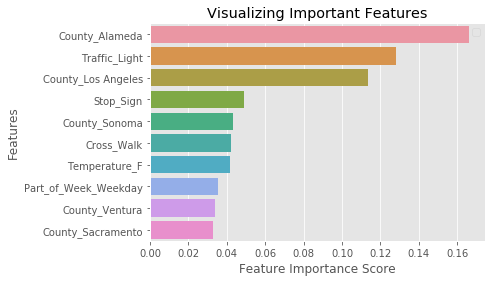

In [75]:
# Visualize important features 
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)

# Create bar plot with top k features
k=10
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:k])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [76]:
# Top k important features
k=20
feature_imp.sort_values(ascending=False)[:k]

County_Alameda          0.166145
Traffic_Light           0.128153
County_Los Angeles      0.113666
Stop_Sign               0.049177
County_Sonoma           0.042976
Cross_Walk              0.042225
Temperature_F           0.041812
Part_of_Week_Weekday    0.035415
County_Ventura          0.033936
County_Sacramento       0.032763
Part_of_Week_Weekend    0.032420
County_Solano           0.029736
County_Fresno           0.025920
County_San Diego        0.025859
Month_July              0.020964
County_Monterey         0.018946
County_Kern             0.014477
County_Santa Barbara    0.011895
County_Stanislaus       0.010874
County_Santa Cruz       0.009358
dtype: float64

In [77]:
# Create selector object that will use the random forest classifier to identify features that have an importance of more than 0.03
sfm = SelectFromModel(clf, threshold=0.03)

sfm.fit(X_train, y_train)
feat_labels=X.columns

# Print names of most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 500


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 500


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  4.4min finished


In [78]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=500, random_state=78, verbose=3, max_depth = 10)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 500


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 500


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  2.7min finished


RandomForestClassifier(max_depth=10, n_estimators=500, random_state=78,
                       verbose=3)

In [79]:
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)

# View The Accuracy Of Our Full Feature Model
print('[Randon forest algorithm -- Full feature] accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_pred)))

# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature Model
print('[Randon forest algorithm -- Limited feature] accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_important_pred)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    6.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[Randon forest algorithm -- Full feature] accuracy_score: 0.707.
[Randon forest algorithm -- Limited feature] accuracy_score: 0.712.


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    6.8s finished


In [81]:
print('Accuracy of logistic regression on training: ', lr.score(X_train_scaled, y_train))
print('Accuracy of logistic regression on testing: ', lr.score(X_test, y_test))

print('Accuracy of random forest on training: ', clf.score(X_train_scaled, y_train))
print('Accuracy of random forest on testing: ', clf.score(X_test, y_test))

print('Accuracy of decision tree on training: ', dt_gini.score(X_train_scaled, y_train))
print('Accuracy of decision tree on testing: ', dt_gini.score(X_test, y_test))

Accuracy of logistic regression on training:  0.49400187750904556
Accuracy of logistic regression on testing:  0.7121417968651722


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   25.6s finished


Accuracy of random forest on training:  0.7058773580900355


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    6.8s finished


Accuracy of random forest on testing:  0.7067766120713513
Accuracy of decision tree on training:  0.7043505060940422
Accuracy of decision tree on testing:  0.7150225174226986


## 7. Summary of Machine Learning Algorithm Results

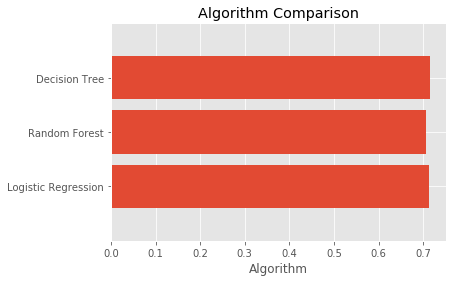

In [86]:
df_graph = pd.read_csv('Accuracy_scores_algorithms_.csv')

ax = plt.barh(y=df_graph['Algorithm'],
        width=df_graph['Accuracy_Score'])

# Set the limit, lables, ticks and title
plt.ylim(-1,3)
plt.xlabel('Algorithm')
plt.title('Algorithm Comparison')

plt.show()

In [84]:
#Pick the most accurate model and save pkl file
pickle.dump(dt_gini, open('decision_tree_v2.pkl','wb'))